### Import Libraries

In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importing plot libs
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [28]:
df = pd.read_csv('users_behavior.csv')

### EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [30]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [31]:
df.duplicated().sum()

0

In [32]:
df['is_ultra'].value_counts()


is_ultra
0    2229
1     985
Name: count, dtype: int64

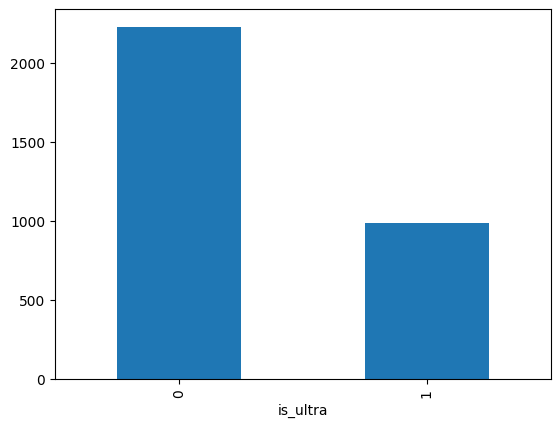

In [52]:
df['is_ultra'].value_counts().plot(kind='bar');

### Analyzing the correlation

In [34]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


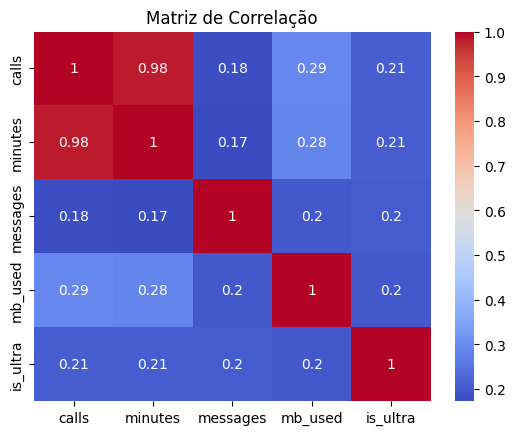

In [51]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');
plt.title('Matriz de Correlação');

### Checking the distribution of columns

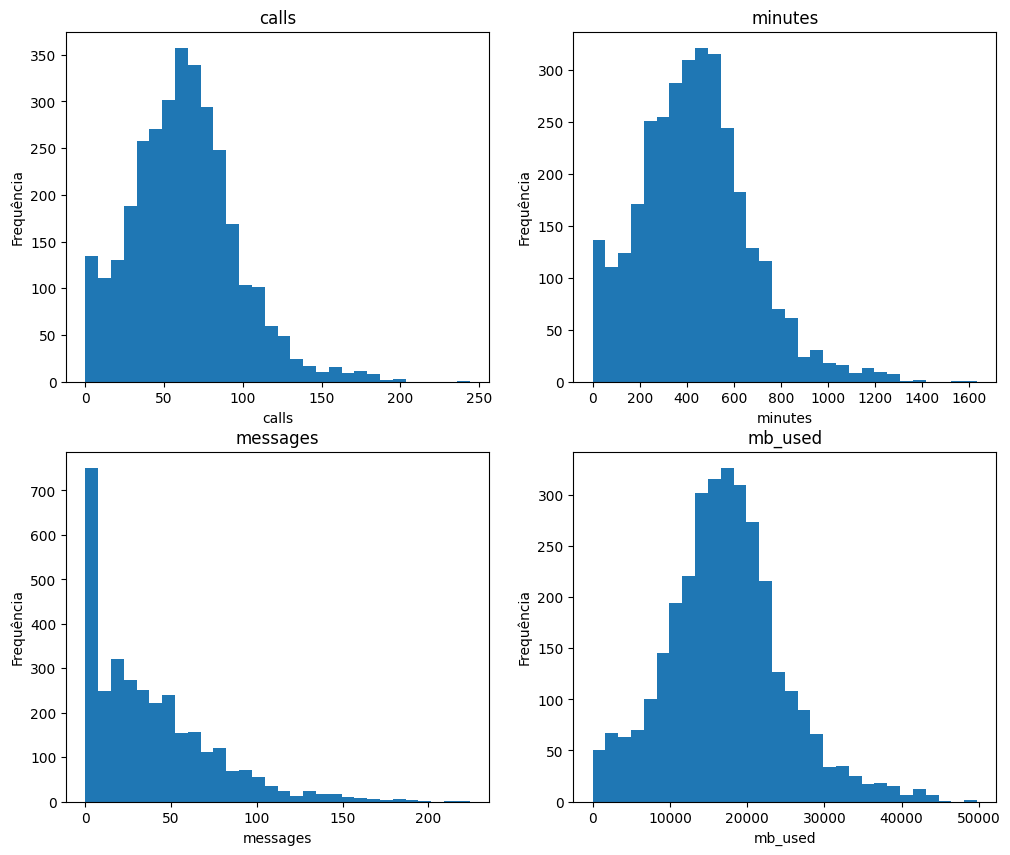

In [36]:
cols = ['calls', 'minutes', 'messages', 'mb_used']
fig , axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

### Defining the features and target

In [37]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

### Dividing the set

In [38]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=123)
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.25, random_state=123)

### Checking the best model

### DecisionTree

In [39]:
best_accuracy_train = 0 
best_accuracy_val = 0
best_depth_train = 0
best_depth_val = 0

for depth in range(1, 51):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model.fit(features_train, target_train)

    predictions_train = model.predict(features_train)
    predictions_val = model.predict(features_val)

    accuracy_train = accuracy_score(target_train, predictions_train)
    accuracy_val = accuracy_score(target_val, predictions_val)

    if accuracy_train > best_accuracy_train:
        best_accuracy_train = accuracy_train
        best_depth_train = depth
    
    if accuracy_val > best_accuracy_val:
        best_accuracy_val = accuracy_val
        best_depth_val = depth

In [54]:
print(f'Accuracy of the best model in the training set: {best_accuracy_train}')
print(f'Max tree depth: {best_depth_train}')

Accuracy of the best model in the training set: 1.0
Max tree depth: 23


In [55]:
print(f'Accuracy of the best model in the validation set: {best_accuracy_val}')
print(f'Max tree depth: {best_depth_val}')

Accuracy of the best model in the validation set: 0.7777777777777778
Max tree depth: 10


Good accuracy of 0.77 using the maximum tree depth of 10, which is very good considering the speed of the model using Decision Tree.

### RandomForest

In [42]:
best_score = 0
best_est = 0

for est in range(1, 51):
    model = RandomForestClassifier(random_state=123, n_estimators=est)
    model.fit(features_train, target_train)
    score = model.score(features_val, target_val)
    if score > best_score:
        best_score = score
        best_est = est

In [56]:
print(f'Accuracy of the best model in the validation set: {best_score}')
print(f'n-estimators: {best_est}')

Accuracy of the best model in the validation set: 0.7993366500829188
n-estimators: 50


Good accuracy in the validation model (0.79) using n-estimators out of 50, being our best model accuracy, but sacrificing some speed using the Random Forest.

### LogisticRegression

In [44]:
model = LogisticRegression(random_state=123, solver='liblinear')
model.fit(features_train, target_train)

LogisticRegression(random_state=123, solver='liblinear')

In [45]:
score_train = model.score(features_train, target_train)
score_valid = model.score(features_val, target_val)

In [57]:
print(f'Training model accuracy: {score_train}')
print(f'Validation model accuracy: {score_valid}')

Training model accuracy: 0.7177642501383509
Validation model accuracy: 0.6849087893864013


Discard the Logistic Regression model because its accuracy in the validation model was only 0.68.

### Testing model quality

For this case I will use the Random Forest model as it was the tested model that obtained the highest accuracy.

Accuracy of the best model in the validation set: 0.7993366500829188

n-estimators: 50

In [47]:
model = RandomForestClassifier(random_state=123, n_estimators=50)
model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=50, random_state=123)

In [48]:
predictions_test = model.predict(features_test)

In [49]:
accuracy_test = accuracy_score(target_test, predictions_test)

In [59]:
print(f'Model accuracy on the test set: {accuracy_test}')

Model accuracy on the test set: 0.8009950248756219


### Conclusion

We created a model with an accuracy of 0.8 without sacrificing much of model speed.